In [120]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib as plt
import requests
import json
import pandas as pd

import numpy as np 
import plotly.plotly as py  
import plotly.tools as tls   
import plotly.graph_objs as go

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
import poloniex as polo
from api_key import key, secret

In [14]:
api = polo.Poloniex(APIKey=key, Secret=secret)

In [8]:
polo.PUBLIC_COMMANDS

['returnTicker',
 'return24hVolume',
 'returnOrderBook',
 'returnTradeHistory',
 'returnChartData',
 'returnCurrencies',
 'returnLoanOrders']

In [10]:
polo.PRIVATE_COMMANDS

['returnBalances',
 'returnCompleteBalances',
 'returnDepositAddresses',
 'generateNewAddress',
 'returnDepositsWithdrawals',
 'returnOpenOrders',
 'returnTradeHistory',
 'returnAvailableAccountBalances',
 'returnTradableBalances',
 'returnOpenLoanOffers',
 'returnActiveLoans',
 'createLoanOffer',
 'cancelLoanOffer',
 'toggleAutoRenew',
 'buy',
 'sell',
 'cancelOrder',
 'moveOrder',
 'withdraw',
 'transferBalance',
 'returnMarginAccountSummary',
 'marginBuy',
 'marginSell',
 'getMarginPosition',
 'closeMarginPosition']

In [17]:
tickers = api.api('returnTicker')
tickers['BTC_ETH']

{'baseVolume': '37561.68671455',
 'high24hr': '0.02760000',
 'highestBid': '0.02685260',
 'id': 148,
 'isFrozen': '0',
 'last': '0.02684188',
 'low24hr': '0.02337147',
 'lowestAsk': '0.02685339',
 'percentChange': '0.13448735',
 'quoteVolume': '1474607.80391269'}

In [21]:
balances = api.api("returnCompleteBalances")
print(balances['ETH'])
print(balances['BTC'])


{'available': '209.96304594', 'onOrders': '0.00000000', 'btcValue': '5.62700963'}
{'available': '3.48217449', 'onOrders': '0.00000000', 'btcValue': '3.48217449'}


In [23]:
marginSum = api.api('returnMarginAccountSummary')
marginSum

{'currentMargin': '0.40794778',
 'lendingFees': '-0.00001542',
 'netValue': '2.97447632',
 'pl': '0.03719362',
 'totalBorrowedValue': '7.29131618',
 'totalValue': '2.93729812'}

All API calls can be found in documentation at https://poloniex.com/support/api/

## Let's look at the order book

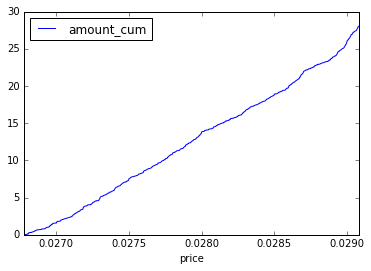

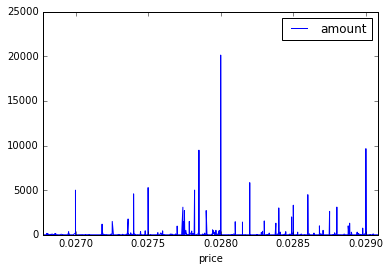

In [73]:
ethBook = pd.DataFrame(api.api('returnOrderBook', {'currencyPair': 'BTC_ETH', 'depth': 1000}))
ask_prices = []
ask_amounts = []
for price, amount in ethBook.asks.values:
    ask_prices.append(float(price))
    ask_amounts.append(float(amount))
df = pd.DataFrame({'price':ask_prices, 'amount': ask_amounts})
df['amount_cum'] = df.price.cumsum()
df.plot(x='price', y='amount_cum')
df.plot(x='price', y='amount')

## !! Make sure you evaluate the cell below before closing !!

In [41]:
# quit the session and close the connection
api.close_session()

Successfully closed API session.


In [40]:
api = poloniex(APIKey=key, Secret=secret)

Successfullly opened API session


In [26]:
api.return24Volume()['BTC_ETH']

{'BTC': '26871.11520108', 'ETH': '1080737.38802197'}

In [27]:
api.returnTicker()

{'BTC_1CR': {'baseVolume': '0.16777754',
  'high24hr': '0.00031268',
  'highestBid': '0.00028204',
  'id': 1,
  'isFrozen': '0',
  'last': '0.00028280',
  'low24hr': '0.00028204',
  'lowestAsk': '0.00028313',
  'percentChange': '-0.01508027',
  'quoteVolume': '552.14335373'},
 'BTC_ABY': {'baseVolume': '0.48598986',
  'high24hr': '0.00000027',
  'highestBid': '0.00000026',
  'id': 2,
  'isFrozen': '0',
  'last': '0.00000026',
  'low24hr': '0.00000026',
  'lowestAsk': '0.00000027',
  'percentChange': '-0.03703703',
  'quoteVolume': '1809133.10514695'},
 'BTC_ADN': {'baseVolume': '1.75034591',
  'high24hr': '0.00000533',
  'highestBid': '0.00000473',
  'id': 4,
  'isFrozen': '0',
  'last': '0.00000456',
  'low24hr': '0.00000422',
  'lowestAsk': '0.00000500',
  'percentChange': '-0.08800000',
  'quoteVolume': '389455.24364973'},
 'BTC_AMP': {'baseVolume': '23.07853908',
  'high24hr': '0.00007865',
  'highestBid': '0.00007196',
  'id': 160,
  'isFrozen': '0',
  'last': '0.00007264',
  'low

In [28]:
api.returnTicker()

{'BTC_1CR': {'baseVolume': '0.16777754',
  'high24hr': '0.00031268',
  'highestBid': '0.00028204',
  'id': 1,
  'isFrozen': '0',
  'last': '0.00028280',
  'low24hr': '0.00028204',
  'lowestAsk': '0.00028313',
  'percentChange': '-0.01508027',
  'quoteVolume': '552.14335373'},
 'BTC_ABY': {'baseVolume': '0.48598986',
  'high24hr': '0.00000027',
  'highestBid': '0.00000026',
  'id': 2,
  'isFrozen': '0',
  'last': '0.00000026',
  'low24hr': '0.00000026',
  'lowestAsk': '0.00000027',
  'percentChange': '-0.03703703',
  'quoteVolume': '1809133.10514695'},
 'BTC_ADN': {'baseVolume': '1.75034591',
  'high24hr': '0.00000533',
  'highestBid': '0.00000473',
  'id': 4,
  'isFrozen': '0',
  'last': '0.00000456',
  'low24hr': '0.00000422',
  'lowestAsk': '0.00000500',
  'percentChange': '-0.08800000',
  'quoteVolume': '389455.24364973'},
 'BTC_AMP': {'baseVolume': '23.07853908',
  'high24hr': '0.00007865',
  'highestBid': '0.00007201',
  'id': 160,
  'isFrozen': '0',
  'last': '0.00007264',
  'low

In [121]:
stream_ids = tls.get_credentials_file()['stream_ids']
stream_ids

['wdbxzgyzo2', '8bqf2c31jt']

In [119]:
stream_id, stream_id2 = stream_ids[0], stream_ids[1]

# Make instance of stream id object 
stream_1 = go.Stream(
    token=stream_id,  # link stream id to 'token' key
    maxpoints=80      # keep a max of 80 pts on screen
)
stream_2 = go.Stream(
    token=stream_id2,
    maxpoints=80
)
# Initialize trace of streaming plot by embedding the unique stream_id
trace1 = go.Scatter(
    x=[],
    y=[],
    mode='lines',
    stream=stream_1,         # (!) embed stream id, 1 per trace
    #yaxis='y2'
)

trace2 = go.Scatter(
    x=[],
    y=[],
    mode='lines',
    stream=stream_2
)

data = go.Data([trace1, trace2])
# Add title to layout object
layout = go.Layout(
    title='Polo BTC/ETH Depth Chart',
#    text_color='rgb(18,27,27)',
    paper_bgcolor='rgb(18,27,27)',
    plot_bgcolor='rgb(18,27,27)',
    yaxis=dict(
        title='Amount ETH',
        titlefont=dict(
            color='rgb(111, 147, 151)'
        ),
        tickfont=dict(
            color='rgb(111, 147, 151)'
        ),
    ),
    xaxis=dict(
        title='Price',
        titlefont=dict(
            color='rgb(111,147,151)'
        ),
        tickfont=dict(
            color='rgb(111,147,151)'
        )
    ),
#     yaxis2=dict(
#         titlefont=dict(
#             color='rgb(111, 147, 151)'
#         ),
#         tickfont=dict(
#             color='rgb(111, 147, 151)'
#         ),
#         overlaying='y',
#         side='right'
#     )
)

# Make a figure object
fig = go.Figure(data=data, layout=layout)

# Send fig to Plotly, initialize streaming plot, open new tab
py.iplot(fig, filename='Polo_plots/depth_chart')

In [104]:
# We will provide the stream link object the same token that's associated with the trace we wish to stream to
s = py.Stream(stream_id)
s2 = py.Stream(stream_id2)

# We then open a connection
s.open()
s2.open()

In [107]:
# (*) Import module keep track and format current time
import datetime 
import time   

# Delay start of stream by 5 sec (time to switch tabs)
time.sleep(5) 

while True:
    ethBook = pd.DataFrame(api.api('returnOrderBook', {'currencyPair': 'BTC_ETH', 'depth': 1000}))
    ask_prices = []
    ask_amounts = []
    bid_prices = []
    bid_amounts = []
    for (ask_price, ask_amount), (bid_price, bid_amount) in zip(ethBook.asks.values,ethBook.bids.values):
        ask_prices.append(float(ask_price))
        ask_amounts.append(float(ask_amount))
        bid_prices.append(float(bid_price))
        bid_amounts.append(float(bid_amount))
    df = pd.DataFrame({'ask_price':ask_prices, 'ask_amount': ask_amounts, 'bid_price': bid_prices, 'bid_amount': bid_amounts})
    df['ask_amount_cum'] = df.ask_amount.cumsum()
    df['bid_amount_cum'] = df.bid_amount.cumsum()
    # Current time on x-axis, random numbers on y-axis
    x = df.ask_price.values
    y = df.ask_amount_cum.values
    x2 = df.bid_price.values
    y2 = df.bid_amount_cum.values
    # Send data to your plot
    s.write(dict(x=x, y=y))  
    s2.write(dict(x=x2, y=y2))
    #     Write numbers to stream to append current data on plot,
    #     write lists to overwrite existing data on plot
# Close the stream when done plotting
s.close() 
s2.close()

KeyboardInterrupt: 

In [ ]:
# Embed never-ending time series streaming plot
tls.embed('streaming-demos','12')

In [95]:
ethBook = pd.DataFrame(api.api('returnOrderBook', {'currencyPair': 'BTC_ETH', 'depth': 300}))
ask_prices = []
ask_amounts = []
bid_prices = []
bid_amounts = []
for (ask_price, ask_amount), (bid_price, bid_amount) in zip(ethBook.asks.values,ethBook.bids.values):
    ask_prices.append(float(ask_price))
    ask_amounts.append(float(ask_amount))
    bid_prices.append(float(bid_price))
    bid_amounts.append(float(bid_amount))
df = pd.DataFrame({'ask_price':ask_prices, 'ask_amount': ask_amounts, 'bid_price': bid_prices, 'bid_amount': bid_amounts})
df['ask_amount_cum'] = df.ask_amount.cumsum()
df['bid_amount_cum'] = df.bid_amount.cumsum()